In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mp
from scipy.stats import moyal
from scipy.optimize import curve_fit
from scipy.stats import linregress

In [8]:
file = '20241202_1950V_8Feabs_10deg_trigger23.txt'
TDC = np.genfromtxt(file, dtype=None, delimiter='\t', usecols=(9,10,11,12,13,14,15,16))
TDC = pd.DataFrame(TDC)
TDC

,0,1,2,3,4,5,6,7
0,1449,1193,1193,1193,1193,1193,1193,1193
1,256,64,113,1194,1194,1194,1194,1194
2,256,63,93,79,89,65,49,295
3,1449,1193,1193,1193,1193,1193,1193,1193
4,256,63,117,1194,1193,1193,1193,1193
...,...,...,...,...,...,...,...,...
5322,1442,1186,1186,1186,106,61,67,292
5323,256,69,88,81,93,66,57,302
5324,256,56,83,73,77,57,45,290
5325,1441,1185,1187,1186,1187,1186,1186,1186


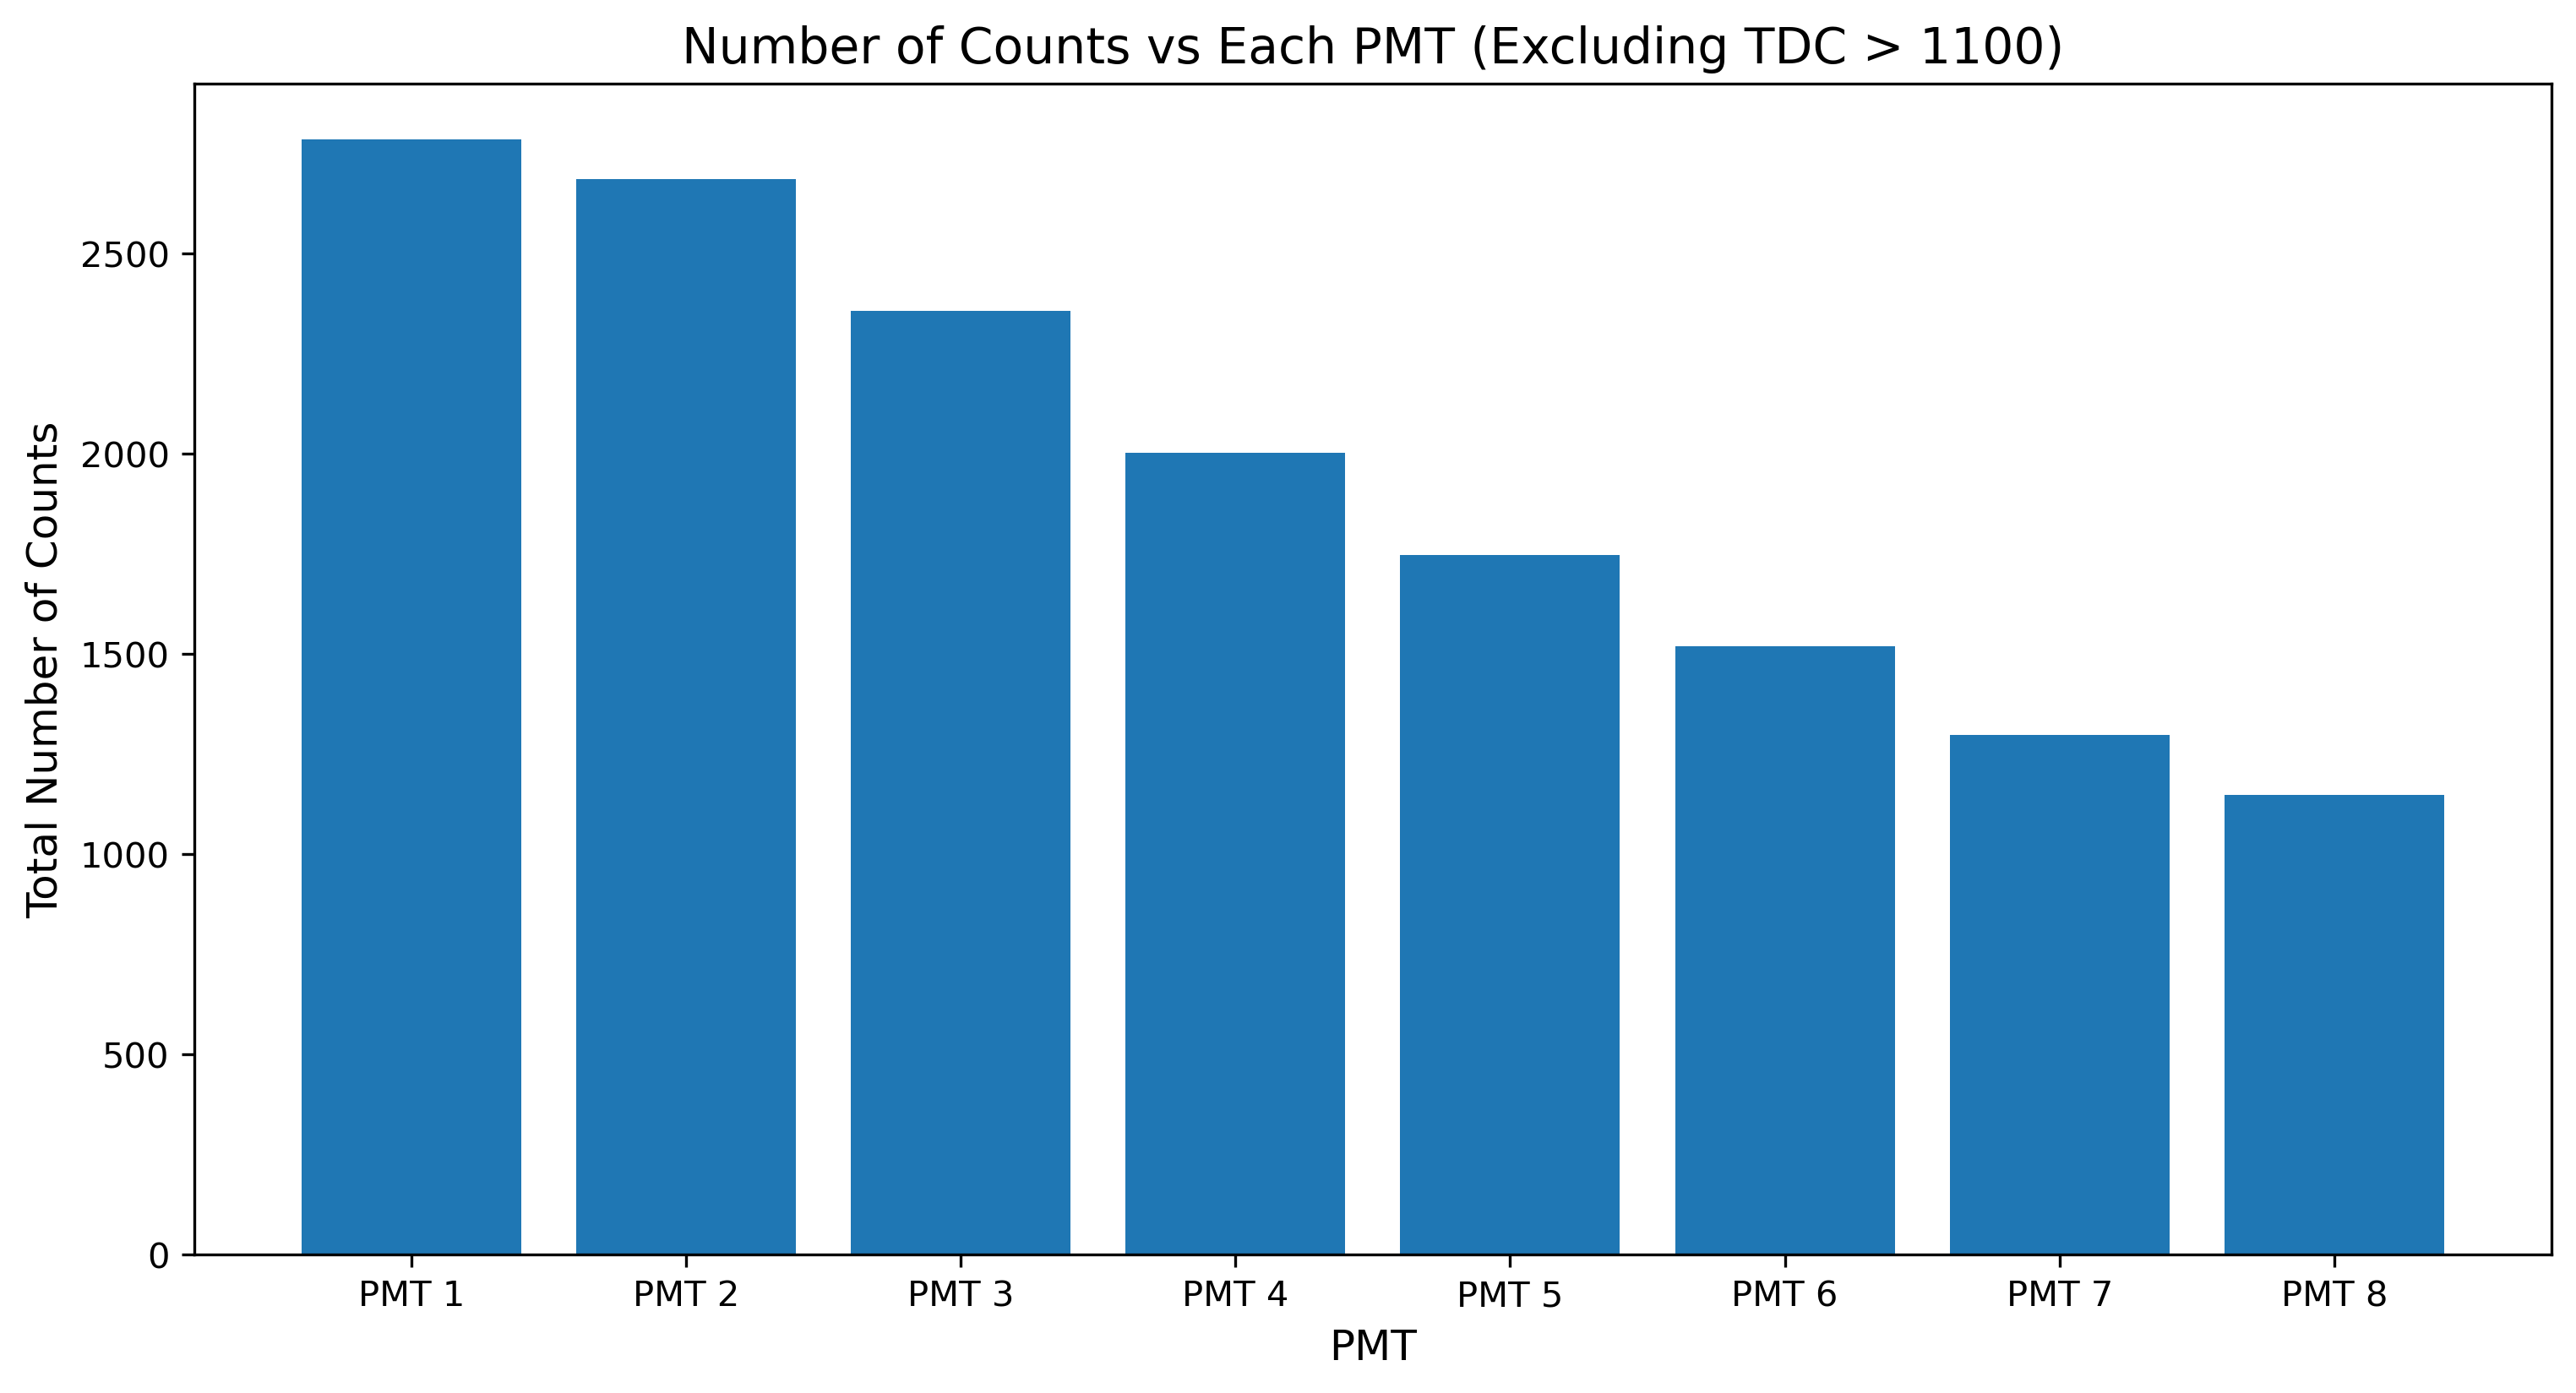

In [9]:
# Plot of number of counts vs the PMT filtering TDC value over 1100
plt.figure(figsize=(12, 6), dpi=300)

pmt_counts = []

for c in range(8):
    filtered_tdc = TDC[c][TDC[c] <= 1100]
    
    counts, _ = np.histogram(filtered_tdc, bins=30)
    
    pmt_counts.append(counts.sum())

plt.bar(range(1, 9), pmt_counts, tick_label=[f'PMT {i+1}' for i in range(8)])

plt.title('Number of Counts vs Each PMT (Excluding TDC > 1100)', fontsize=14)
plt.xlabel('PMT', fontsize=12)
plt.ylabel('Total Number of Counts', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.savefig('countsPMT.png', dpi=300, bbox_inches='tight', transparent=True)

plt.show()